### CASO UBER

In [1]:
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("D:/Python/2. Nivel II/2/datos")

In [3]:
uber = pd.read_csv("uber-raw-data-apr14.csv")

In [4]:
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
len(uber)

564516

**Objetivo**: realizar la segmentación de rutas para la empresa UBER

**¿Cómo notifico a un proveedor de servicio de taxi de una alerta de usuario?**

In [6]:
uber.drop(["Date/Time","Base"],axis=1,inplace=True)

In [7]:
uber.head()

,Lat,Lon
0,40.7690,-73.9549
1,40.7267,-74.0345
2,40.7316,-73.9873
3,40.7588,-73.9776
4,40.7594,-73.9722


In [8]:
uber.isnull().sum()

Lat    0
Lon    0
dtype: int64

In [9]:
xs = uber.values

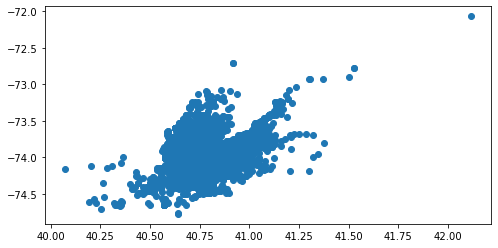

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(xs[:,0],xs[:,1])
plt.show()

**Usamos el escalamiento por normalización**

**Paso 1: escalamiento de los datos**

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
ms = MinMaxScaler()

In [13]:
X = ms.fit_transform(xs)

In [14]:
X

array([[0.34060772, 0.30236081],
       [0.31990997, 0.2729523 ],
       [0.32230758, 0.29039051],
       ...,
       [0.3285218 , 0.28979939],
       [0.2949063 , 0.30768094],
       [0.30097372, 0.30018103]])

In [16]:
df_uber = pd.DataFrame(X,columns=uber.columns)

In [17]:
df_uber.head()

,Lat,Lon
0,0.340608,0.302361
1,0.319910,0.272952
2,0.322308,0.290391
3,0.335617,0.293974
4,0.335910,0.295969


**Paso 2: visualización**

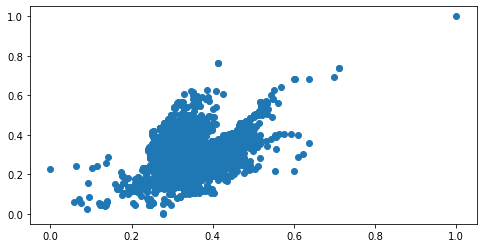

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(X[:,0],X[:,1])
plt.show()

**Paso 3: número óptimo de clúster**

**Nota**: cómputo (infraestructura) que utiliza la librería.

- **sklearn**: utiliza un nodo para procesar los cálculos.
- **h2o**: utiliza un clúster (crea) a nivel de CPU (es decir, si nuestro ordenador cuenta con 12 nodos realiza un cluster con estos).
- **RAPIDS**: utiliza un clúster (crea) a nivel de GPU (es decir, si contamos con un GPU de 3400 nodos realiza un clúster con estos).
- **Automl(Azure)**: realizar una configuración de tu clúster de proceso (Microsoft nos ofrece diferentes alternativas de cómputo en la nube).
- **SageMaker(AWS)**: realizar una configuración de tu clúster de proceso (Amazon nos ofrece diferentes alternativas de cómputo en la nube).

**Nota**: utilizar silueta como criterio para establece el número óptimo de k tiene un alto costo computacional.

**Método del codo o inertia**

In [22]:
from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.cluster import KMeans

In [23]:
coef_inertia_uber =[]

In [25]:
for i in range(2,11):
    kmeans_model=KMeans(n_clusters=i,
                       init="k-means++",
                       max_iter=300,
                       n_init=10,
                       random_state=2022)
    kmeans_model.fit(df_uber)
    coef_inertia_uber.append(kmeans_model.inertia_)

In [26]:
coef_inertia_uber

[259.6134335703793,
 178.25179205416975,
 145.71190410359682,
 116.96913939933171,
 91.81981016354021,
 76.02648039099566,
 66.43678417114333,
 58.45338517990453,
 52.537683960184246]

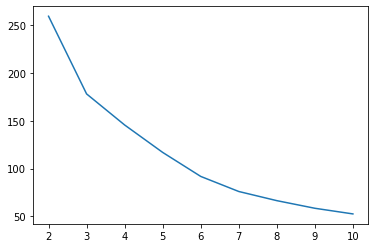

In [27]:
plt.plot(range(2,11),
        coef_inertia_uber)
plt.show()

**Nota** concluímos que el número óptimo de k es =3

**Paso 4: identificar los k grupos**

In [28]:
kmeans_model=KMeans(n_clusters=3,
                       init="k-means++",
                       max_iter=300,
                       n_init=10,
                       random_state=2022)

In [29]:
kmeans_model=kmeans_model.fit(df_uber)

In [30]:
y_kmeans= kmeans_model.predict(df_uber) + 1

In [31]:
y_kmeans

array([3, 1, 1, ..., 1, 1, 1])

In [32]:
data_values = uber.values

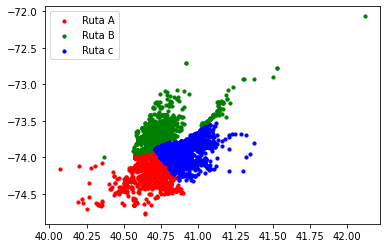

In [34]:
plt.scatter(data_values[y_kmeans==1,0],
           data_values[y_kmeans==1,1],
           s=10,
           c="red",
           label="Ruta A")
plt.scatter(data_values[y_kmeans==2,0],
           data_values[y_kmeans==2,1],
           s=10,
           c="green",
           label="Ruta B")
plt.scatter(data_values[y_kmeans==3,0],
           data_values[y_kmeans==3,1],
           s=10,
           c="blue",
           label="Ruta c")
plt.legend()
plt.show()

**Solicitud de servicio de taxi realizada por Allison**

In [35]:
Allison = pd.DataFrame({"Lat":[40.7690],"Lon":[-73.9548]})

In [36]:
sol_allison = kmeans_model.predict(ms.transform(Allison)) +1; print(sol_allison)

[3]


**Ruta en la que se encuentra Manuel**

In [37]:
Manuel = pd.DataFrame({"Lat":[40.7688],"Lon":[-73.9612]})

In [39]:
Chof = kmeans_model.predict(ms.transform(Manuel)) +1; print(Chof)

[3]


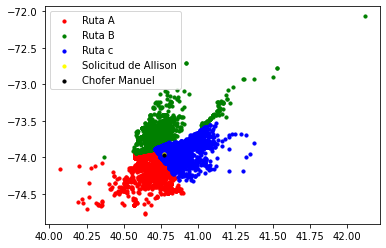

In [40]:
plt.scatter(data_values[y_kmeans==1,0],
           data_values[y_kmeans==1,1],
           s=10,
           c="red",
           label="Ruta A")
plt.scatter(data_values[y_kmeans==2,0],
           data_values[y_kmeans==2,1],
           s=10,
           c="green",
           label="Ruta B")
plt.scatter(data_values[y_kmeans==3,0],
           data_values[y_kmeans==3,1],
           s=10,
           c="blue",
           label="Ruta c")

solicitud_v = Allison.values
plt.scatter(solicitud_v[sol_allison==3,0],
           solicitud_v[sol_allison==3,1],
           s=10,
           c="Yellow",
           label="Solicitud de Allison")

chofer_v = Manuel.values
plt.scatter(chofer_v[Chof==3,0],
           chofer_v[Chof==3,1],
           s=10,
           c="Black",
           label="Chofer Manuel")

plt.legend()
plt.show()

**Nota**: h2o es una librería desarrollada en Java.

### Clúster K-means con h2o

In [ ]:
pip install h2o

In [41]:
import h2o

In [42]:
h2o.init(nthreads=-1,
        max_mem_size="8g")

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\ProgramData\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp4b_stvin
  JVM stdout: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp4b_stvin\h2o_SOCIAL_DATA_started_from_python.out
  JVM stderr: C:\Users\SOCIAL~1\AppData\Local\Temp\tmp4b_stvin\h2o_SOCIAL_DATA_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Bogota
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.5
H2O_cluster_version_age:,10 months and 7 days !!!
H2O_cluster_name:,H2O_from_python_SOCIAL_DATA_okj72w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.111 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [43]:
from h2o.estimators.kmeans import H2OKMeansEstimator

In [44]:
km = H2OKMeansEstimator(categorical_encoding="one_hot_explicit",
                       k=3,
                       seed=2022,
                       max_iterations=100)

In [45]:
predictores = df_uber.columns.tolist()

**Nota**: h2o es una librería desarrollada en JAVA y no podemos aplicar una función a un objeto DF de python.

In [46]:
uberh2o=h2o.H2OFrame(df_uber)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [47]:
type(uberh2o)

h2o.frame.H2OFrame

In [48]:
type(df_uber)

pandas.core.frame.DataFrame

In [49]:
km.train(x=predictores,
        training_frame=uberh2o)

kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [50]:
km.scoring_history()

,,timestamp,duration,iterations,number_of_reassigned_observations,within_cluster_sum_of_squares
0,,2022-06-12 11:59:39,0.142 sec,0.0,NaN,NaN
1,,2022-06-12 11:59:40,0.647 sec,1.0,564516.0,1.865994e+06
2,,2022-06-12 11:59:40,0.832 sec,2.0,860.0,1.020221e+06
3,,2022-06-12 11:59:40,0.874 sec,3.0,1526.0,1.003651e+06
4,,2022-06-12 11:59:40,0.928 sec,4.0,3208.0,9.843611e+05
5,,2022-06-12 11:59:40,0.969 sec,5.0,7557.0,9.539988e+05
6,,2022-06-12 11:59:40,1.008 sec,6.0,15610.0,9.310893e+05
7,,2022-06-12 11:59:40,1.073 sec,7.0,41884.0,8.699079e+05
8,,2022-06-12 11:59:40,1.162 sec,8.0,34961.0,8.267763e+05
9,,2022-06-12 11:59:41,1.243 sec,9.0,49855.0,8.039210e+05


In [51]:
cluster = km.predict(uberh2o) +1

kmeans prediction progress: |█████████████████████████████████████████████| 100%


In [52]:
cluster_df= h2o.h2o.as_list(cluster,use_pandas=True)

In [53]:
uber["Cluster"]=cluster_df.values

In [56]:
uber.head(n=30)

,Lat,Lon,Cluster
0,40.7690,-73.9549,2
1,40.7267,-74.0345,1
2,40.7316,-73.9873,1
3,40.7588,-73.9776,2
4,40.7594,-73.9722,2
5,40.7383,-74.0403,2
6,40.7223,-73.9887,1
7,40.7620,-73.9790,2
8,40.7524,-73.9960,2
9,40.7575,-73.9846,2


## Clúster Jerárquico

In [57]:
import pandas as pd
import numpy as np

In [58]:
variables = ["X","Y"]
labels=["ID_0","ID_1","ID_2","ID_3","ID_4"]

In [59]:
np.random.seed(123)

In [61]:
X= np.random.random_sample([5,2])*10

In [62]:
df = pd.DataFrame(X,
                 columns=variables,
                 index=labels)

In [63]:
df.head()

,X,Y
ID_0,6.964692,2.861393
ID_1,2.268515,5.513148
ID_2,7.194690,4.231065
ID_3,9.807642,6.848297
ID_4,4.809319,3.921175


In [66]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

**Paso 1: escalamiento**

In [67]:
std = StandardScaler()

In [68]:
data_std=std.fit_transform(df)

In [69]:
data_std

array([[ 0.29882088, -1.31711231],
       [-1.55810367,  0.60867913],
       [ 0.38976477, -0.32241188],
       [ 1.42295728,  1.57830886],
       [-0.55343926, -0.5474638 ]])

**Paso 2: construir una matriz de distancia**

In [70]:
df_std = pd.DataFrame(data_std)

In [73]:
pd.DataFrame(squareform(pdist(df_std,
                             metric="euclidean")),
            columns=labels,
            index=labels)

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,2.675227,0.998849,3.105986,1.148349
ID_1,2.675227,0.000000,2.158963,3.134790,1.531671
ID_2,0.998849,2.158963,0.000000,2.163383,0.969681
ID_3,3.105986,3.134790,2.163383,0.000000,2.902594
ID_4,1.148349,1.531671,0.969681,2.902594,0.000000


**Paso 3: visualización para fines ilustrativos**

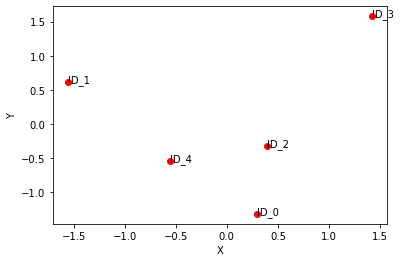

In [76]:
plt.scatter(df_std.iloc[:,0].values, df_std.iloc[:,1].values, color="red")
plt.xlabel("X")
plt.ylabel("Y")
for i, label in enumerate(labels):
    plt.annotate(label,(data_std[i][0],data_std[i][1]))
plt.show()

In [77]:
from scipy.cluster.hierarchy import linkage

In [78]:
cluster = linkage(pdist(df_std,metric="euclidean"),method="single")

In [ ]:
pip install scipy

In [79]:
from scipy.cluster.hierarchy import dendrogram

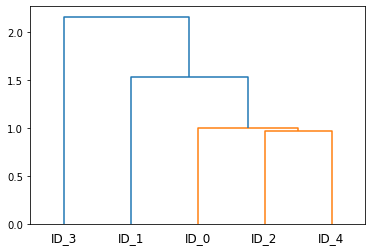

In [80]:
dendograma = dendrogram(cluster, labels=labels)

**Paso 4: agregar a qué clúster pertenece cada una de las observaciones**

In [82]:
from sklearn.metrics import euclidean_distances, silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [83]:
silueta=[]
for i in range(2,5):
    agnes = AgglomerativeClustering(n_clusters=i,
                                   affinity="euclidean",
                                   linkage="single")
    silueta.append(silhouette_score(X,agnes.fit_predict(X)))

In [84]:
silueta

[0.30758371787876365, 0.2596626119320968, 0.16887394203608858]

In [85]:
k=[2,3,4]

In [86]:
pd.DataFrame({"Silueta":silueta,
             "Número óptimo de clusters":k})

,Silueta,Número óptimo de clusters
0,0.307584,2
1,0.259663,3
2,0.168874,4


**Nota**: el número óptimo de clusters es 2 (mayor valor en el coef. de silueta)

**Paso 5: modelado**

In [87]:
agnes = AgglomerativeClustering(n_clusters=2,
                                   affinity="euclidean",
                                   linkage="single")

In [88]:
df["cluster_AGNES"] = agnes.fit_predict(X) +1

In [89]:
df.head()

,X,Y,cluster_AGNES
ID_0,6.964692,2.861393,1
ID_1,2.268515,5.513148,1
ID_2,7.194690,4.231065,1
ID_3,9.807642,6.848297,2
ID_4,4.809319,3.921175,1
